<h2 id="Understanding the shape of the data (EDA)">Understanding the shape of the data (EDA)</h2>

For this data I'll use the pandas_profiling library which automatically generates a standardized univariate and multivariate report for data understanding (https://pandas-profiling.ydata.ai/docs/master/pages/getting_started/overview.html)

In [ ]:
# import libraries
%pip install pandas_profiling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
#reading data
training=pd.read_excel('bike_train.xlsx')
test=pd.read_excel('bike_test.xlsx')

In [3]:
prof=ProfileReport(training)
prof.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<h3 id="Report takeaways:">Report takeaways:</h3>

- Numerical data: 10

- Categorical data: 6 = 
 season, year, holiday, weekday, workingday weathersit
  
    <pre>Please note that the profiling report isn't able to properly identify  "working day" as a
    categorical variable.
    Also, these variables are already standarized, so there is no need for a data-cleaning/standarizing procces </pre>


- Missing data: No data missing!

<b> Correlations from profiling Report: </b>

On one hand, data related with datetime (season, yr, mnth) has an intuitive correlation with climate conditions such as temp, atemp, windspeed and so on; while the hour (hr) seems to be well correlated with the counting rental features (casual, registered, cnt) 

On the other hand, holiday, weekday and working day have not an importance with the target features, so may be droped when building the ML model.



<b>Interesting correlations from profiling Report that may diserve further exploration: </b>
- hr + (casual, registered, cnt)
- temp + casual


,hr,temp,casual,registered,cnt
hr,1.000000,0.139251,0.285182,0.381933,0.396698
temp,0.139251,1.000000,0.450777,0.322875,0.395743
casual,0.285182,0.450777,1.000000,0.503185,0.702414
registered,0.381933,0.322875,0.503185,1.000000,0.968540
cnt,0.396698,0.395743,0.702414,0.968540,1.000000


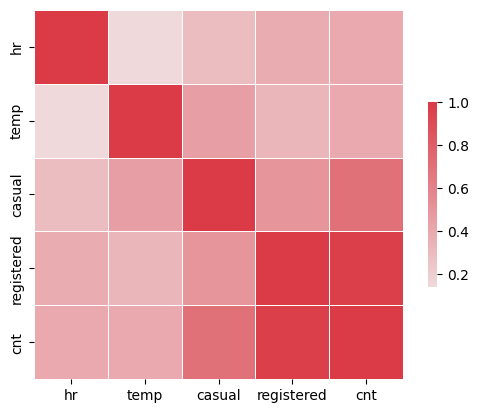

In [14]:
#lets see in depth these variables
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(training[['hr','temp','casual','registered','cnt']].corr(),vmax=1, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

training[['hr','temp','casual','registered','cnt']].corr()

Unfortunaly, the target data (cnt and derivates) has a weak correlation value with hr and temp, ranging from 0.38 to 0.45.
This will be take in mind when discusing the results of the models.

<b> Outliers: </b>

In [4]:
training.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<AxesSubplot:>

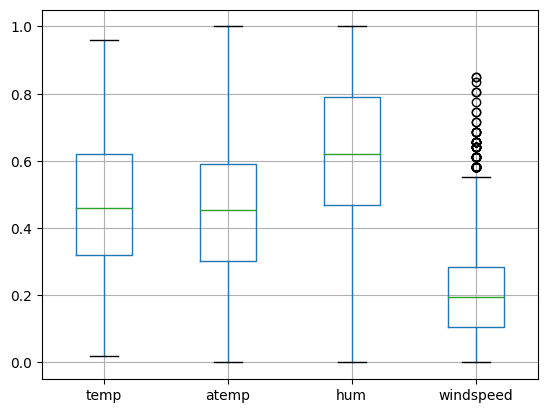

In [16]:
#climate conditions
training.boxplot(column=['temp','atemp','hum','windspeed'])


<AxesSubplot:>

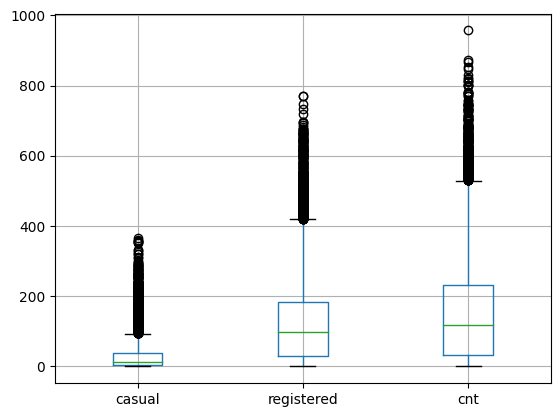

In [17]:
training.boxplot(column=['casual','registered','cnt'])

Humitiy (hum) has outliers

In [29]:
pd.pivot_table(training, index=['temp'], values='cnt').sort_values('cnt',ascending=False).head(5)

,cnt
temp,
0.84,283.117647
0.80,279.708075
0.74,269.932432
0.72,265.296053
0.76,264.359375


In [30]:
pd.pivot_table(training, index=['hum'], values='cnt').sort_values('cnt',ascending=False).head(5)

,cnt
hum,
0.18,379.714286
0.20,374.600000
0.17,340.400000
0.22,319.884615
0.27,312.913793
